<a href="https://colab.research.google.com/github/anaghasanthoshh/LearningTensorFlow/blob/main/Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural networks with Tensor Flow

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.17.1


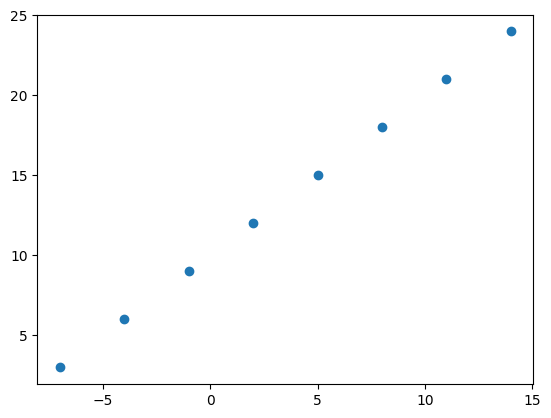

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([-7,-4,-1,2,5,8,11,14])
y=np.array([3,6,9,12,15,18,21,24])
plt.scatter(X,y)

In [ ]:
X=tf.constant(X)
y=tf.constant(y)

In [ ]:
#Concept of early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential()
model.add(keras.layers.Dense(1,input_dim=1,activation='relu'))

model.compile(loss='MAE',optimizer='SGD',metrics=["mae"])

model_history=model.fit(X,y,epochs=1000,batch_size=3,callbacks=early_stopping)

In [34]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([[ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 4.4314747],
       [ 9.9436865],
       [15.455899 ],
       [20.968111 ],
       [26.480324 ]], dtype=float32)

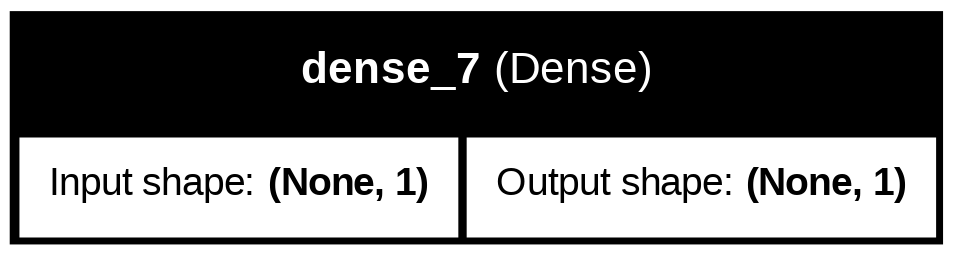

In [35]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Saving a model:2 options mainly


1.   SavedModel format
2.   HDF5



In [36]:
model.save('my_model.keras')

In [37]:
model.save('my_model.h5')

## Loading the saved model back :

In [39]:
model=keras.models.load_model('my_model.keras')
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)